In [518]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly as pl
import scipy.optimize as opt
from scipy import optimize
from scipy.io import loadmat
import seaborn as sns

In [519]:
data=loadmat('machine-learning-ex5\ex5\ex5data1.mat')

In [721]:
X=data['X']
origX=data['X']
y=data['y']
Xtest=data['Xtest']
ytest=data['ytest']
Xval=data['Xval']
yval=data['yval']

In [585]:
#validationdata
ones=np.ones((len(Xval),1))
Xval=np.hstack((ones,Xval))

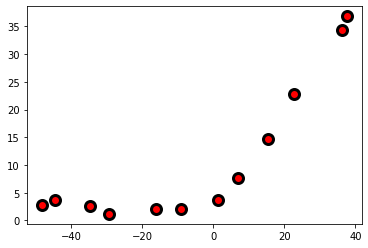

In [584]:

plt.plot(X,y, 'ro', ms=10, mec='k', mew=3)

In [618]:
def featuremapping(X,p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(p):
            X_poly[:, i] = X[:, 0] ** (i + 1)

    # ============================================================
    return X_poly

In [532]:
def costfunction(theta,X,y,lmbda):
    m=len(y)
    temp=np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)
    temp=temp+(lmbda/(2*m))*np.sum(np.power(theta[1:],2))
    return temp
    

In [641]:
def featurenormalize(X):    
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

In [855]:
def newtrainlinear(theta,X,y,lmbda):
    theta=np.ones([X.shape[1],1])
    options = {'maxiter': 200}
    theta=optimize.minimize(fun=costfunction,x0=theta, method='TNC',args=(X,y.flatten(),lmbda), options=options)
    return theta.x

    

In [806]:
def lrgradient(theta,X,y,lmbda):
    m=len(y)
    theta=(np.dot(X.T,np.dot(X,theta)-y))
    theta=theta/m
    theta[1:]=theta[1:]+(lmbda/m)*theta[1:]
    return theta

In [807]:
def trainlinear(theta,X,y,lmbda):
    theta=np.ones([X.shape[1],1])
    theta=opt.fmin_cg(f=costfunction,x0=theta.flatten(),fprime=lrgradient,args=(X,y.flatten(),lmbda),maxiter=100)[:,np.newaxis]
    return theta

In [759]:
#normal regression
m=len(y)
ones=np.ones([m,1])
linx=X
linx=np.hstack((ones,linx))
m,n=linx.shape
theta=np.ones((n,1))
lmbda=0
print(linx.shape,theta.shape)

(12, 2) (2, 1)


In [760]:

options = {'maxiter': 200}
optimize.minimize(fun=costfunction,x0=theta.flatten(),args=(linx,y.flatten(),lmbda), options=options)

      fun: 22.373906495108926
 hess_inv: array([[1.02947531, 0.00612691],
       [0.00612691, 0.0012134 ]])
      jac: array([2.38418579e-07, 7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([13.08790346,  0.36777922])

[[-183.63618809]
 [7776.17634091]]
Optimization terminated successfully.
         Current function value: 22.379542
         Iterations: 30
         Function evaluations: 133
         Gradient evaluations: 129
[[13.08790303]
 [ 0.36777923]]


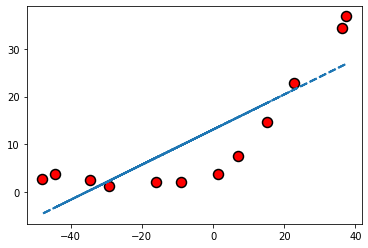

In [761]:
costfunction(theta,linx,y,lmbda)
lmbda=1
print(lrgradient(theta,linx,y,lmbda))
newtheta=trainlinear(theta,linx,y,lmbda)
print(newtheta)
plt.plot(linx[:,1],y,'ro',ms=10, mec='k', mew=1.5)
plt.plot(linx[:,1],np.dot(linx,newtheta),'--',lw='2')

In [594]:
m,n=linx.shape
lmbda=0
theta=np.ones((n,1))
trainerror=np.zeros(0)
cverror=np.zeros(1)

for i in range(1,len(y)+1):
    newx=linx[0:i,:]
    newy=y[0:i,:]
    theta=trainlinear(theta,newx,newy,lmbda)
    trainerror=np.append(trainerror,np.array(costfunction(theta,newx,newy,0)))
    cverror=np.append(cverror,np.array(costfunction(theta,Xval,yval,0)))


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 4
         Gradient evaluations: 4
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 3.286595
         Iterations: 4
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 4
         Function evaluations: 8
         Gradi

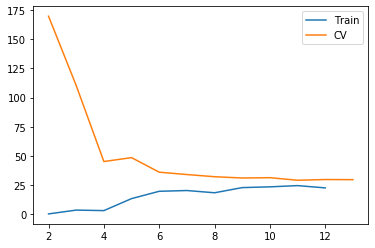

In [602]:
plt.plot(list(range(2,len(trainerror)+1)),trainerror[1:],label='Train')
plt.plot(list(range(2,len(cverror)+1)),cverror[1:],label='CV')
plt.legend()
plt.show()

In [696]:
#poly regression
m=len(y)
ones=np.ones([m,1])
#map X ontp poly features and Normalize
X_poly=featuremapping(X,8)
X_poly,mu,sigma=featurenormalize(X_poly)
print(mu,sigma)
X_poly=np.hstack((ones,X_poly))
m,n=X_poly.shape
print(X_poly[0,:])


[-5.08542635e+00  8.48904834e+02 -1.28290173e+04  1.28967789e+06
 -2.98314592e+07  2.29330301e+09 -6.84527284e+10  4.42233759e+12] [2.99644020e+01 7.87889103e+02 4.81896178e+04 1.73490431e+06
 9.39392040e+07 3.85345373e+09 1.97934705e+11 8.68896800e+12]
[ 1.         -0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792
 -0.59087767  0.3445158  -0.50848117]


In [725]:
#map X ontp polytest and  features and Normalize
ones=np.ones([Xtest.shape[0],1])
X_poly_test=featuremapping(Xtest,8)
X_poly_test-=mu
X_poly_test/=sigma
X_poly_test=np.hstack((ones,X_poly_test))


X_poly_val=featuremapping(Xval,8)
X_poly_val-=mu
X_poly_val/=sigma
ones=np.ones([Xval.shape[0],1])
X_poly_val=np.hstack((ones,X_poly_val))

In [648]:
theta=np.ones((X_poly.shape[1],1))
print(X_poly.shape,y.shape,theta.shape)
print(costfunction(theta,X_poly,y,0))
newtheta=trainlinear(theta,X_poly,y,0)
print(newtheta)
costfunction(newtheta,X_poly,y,0)

(12, 9) (12, 1) (9, 1)
104.63216207771355
         Current function value: 0.043883
         Iterations: 100
         Function evaluations: 217
         Gradient evaluations: 217
[[ 11.21324415]
 [ 10.86351057]
 [ 20.33118704]
 [ 17.47047514]
 [-38.03023966]
 [-42.11478801]
 [ 34.03455951]
 [ 33.26147356]
 [ -3.05769856]]


0.043882853074015904

[[ -1.93474253   3.9694814   -4.93714476 ...  15.72130595 -19.68501541
   28.26496052]
 [ -1.93307389   3.96148105  -4.92477717 ...  15.64383484 -19.57410084
   28.08294513]
 [ -1.93140524   3.95348706  -4.91242919 ...  15.5666705  -19.46371311
   27.90193798]
 ...
 [  2.25189199   3.8631748    5.30604989 ...  14.71182042  18.93842898
   25.91615408]
 [  2.25356064   3.87109675   5.3181763  ...  14.78556955  19.04298022
   26.08604577]
 [  2.25522928   3.87902504   5.33032214 ...  14.85961456  19.14803498
   26.25689241]]


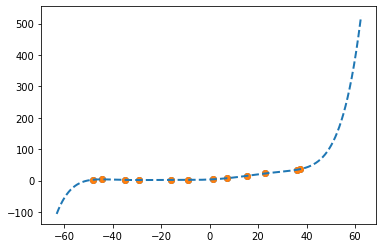

In [683]:
plt.scatter(X,y)
plotfit(np.min(X),np.max(X),mu,sigma,newtheta,8)

In [682]:
def plotfit(min_x,max_x,mu,sigma,theta,p):
    x = np.arange(min_x - 15, max_x + 25, 0.05).reshape(-1, 1)
    x_poly=featuremapping(x,p)
    x_poly=x_poly-mu
    x_poly=x_poly/(sigma)
    ones=np.ones((x_poly.shape[0],1))
    #add ones 
    print(x_poly)
    x_poly=np.hstack((ones,x_poly))
    #print(x_poly.shape)
    #print(np.dot(x_poly,theta))
    plt.scatter(X,y)
    plt.plot(x,np.dot(x_poly,theta),'--',lw=2)

In [771]:
#learning curves
m,n=X_poly.shape
lmbda=1
theta=np.ones((n,1))
trainerror=np.zeros(0)
cverror=np.zeros(0)

for i in range(1,len(y)+1):
    newx=X_poly[0:i,:]
    newy=y[0:i,:]
    theta=trainlinear(theta,newx,newy,lmbda)
    trainerror=np.append(trainerror,np.array(costfunction(theta,newx,newy,0)))
    cverror=np.append(cverror,np.array(costfunction(theta,X_poly_val,yval,0)))


         Current function value: 2.986166
         Iterations: 1
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 1.336998
         Iterations: 1
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 26.094624
         Iterations: 2
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 19.012936
         Iterations: 6
         Function evaluations: 130
         Gradient evaluations: 118
         Current function value: 14.378296
         Iterations: 7
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 11.362757
         Iterations: 19
         Function evaluations: 83
         Gradient evaluations: 73
         Current function value: 10.319667
         Iterations: 7
         Function evaluations: 125
         Gradient evaluations: 113
         Current function value: 8.982378
         Ite

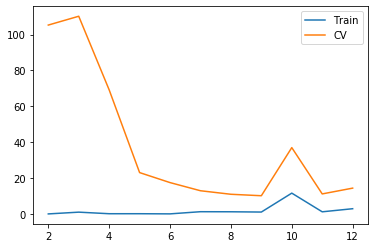

In [772]:
plt.plot(list(range(2,len(trainerror)+1)),trainerror[1:],label='Train')
plt.plot(list(range(2,len(cverror)+1)),cverror[1:],label='CV')
plt.legend()
plt.show()

In [693]:
print(cverror)

[134.73014493 134.06173037 120.8672745  114.22353847 108.49189691
 129.72183471 106.62137647 102.99943339 116.9335789  118.65545036
 115.05359719 121.45928553]


In [694]:
print(trainerror)

[9.86076132e-32 6.16297582e-32 3.07788182e-11 5.52627689e-11
 4.20367102e-10 1.58372468e-08 3.15104112e-02 6.99722278e-02
 1.59902659e-01 9.93170597e-02 1.85663404e-01 4.38828531e-02]


         Current function value: 29.157750
         Iterations: 2
         Function evaluations: 113
         Gradient evaluations: 101
[[ -1.93474253   3.9694814   -4.93714476 ...  15.72130595 -19.68501541
   28.26496052]
 [ -1.93307389   3.96148105  -4.92477717 ...  15.64383484 -19.57410084
   28.08294513]
 [ -1.93140524   3.95348706  -4.91242919 ...  15.5666705  -19.46371311
   27.90193798]
 ...
 [  2.25189199   3.8631748    5.30604989 ...  14.71182042  18.93842898
   25.91615408]
 [  2.25356064   3.87109675   5.3181763  ...  14.78556955  19.04298022
   26.08604577]
 [  2.25522928   3.87902504   5.33032214 ...  14.85961456  19.14803498
   26.25689241]]


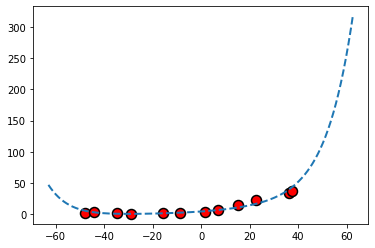

In [786]:
#let's plot for lmbda=100
theta=np.ones((X_poly.shape[1],1))
p=8
lmbda=3
newtheta=trainlinear(theta,X_poly,y,lmbda)
plt.plot(X,y,'ro',ms=10,mew=1.5,mec='k')
plotfit(np.min(X),np.max(X),mu,sigma,newtheta,8)

array([[ 1.00000000e+00, -3.62140776e-01, -7.55086688e-01,
         1.82225876e-01, -7.06189908e-01,  3.06617917e-01,
        -5.90877673e-01,  3.44515797e-01, -5.08481165e-01],
       [ 1.00000000e+00, -8.03204845e-01,  1.25825266e-03,
        -2.47936991e-01, -3.27023420e-01,  9.33963187e-02,
        -4.35817606e-01,  2.55416116e-01, -4.48912493e-01],
       [ 1.00000000e+00,  1.37746700e+00,  5.84826715e-01,
         1.24976856e+00,  2.45311974e-01,  9.78359696e-01,
        -1.21556976e-02,  7.56568484e-01, -1.70352114e-01],
       [ 1.00000000e+00,  1.42093988e+00,  7.06646754e-01,
         1.35984559e+00,  3.95534038e-01,  1.10616178e+00,
         1.25637135e-01,  8.71929081e-01, -5.96376930e-02],
       [ 1.00000000e+00, -1.43414853e+00,  1.85399982e+00,
        -2.03716308e+00,  2.33143133e+00, -2.41153626e+00,
         2.60221195e+00, -2.64567451e+00,  2.76608525e+00],
       [ 1.00000000e+00, -1.28687086e-01, -9.75968776e-01,
         2.51385075e-01, -7.39686869e-01,  3.169529

In [858]:
#learning curves for different lmnbda
lmbdavec=[0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
#learning curves
m,n=X_poly.shape
lmbda=1
theta=np.ones((n,1))
trainerror=np.zeros(0)
cverror=np.zeros(0)
for i in range(len(lmbdavec)):
    newtheta=trainlinear(theta,X_poly,y,lmbdavec[i])
    trainerror=np.append(trainerror,np.array(costfunction(newtheta,X_poly,y,lmbdavec[i])))
    cverror=np.append(cverror,np.array(costfunction(newtheta,X_poly_val,yval,lmbdavec[i])))

         Current function value: 0.037773
         Iterations: 100
         Function evaluations: 227
         Gradient evaluations: 227
         Current function value: 0.207222
         Iterations: 99
         Function evaluations: 266
         Gradient evaluations: 255
         Current function value: 0.276834
         Iterations: 56
         Function evaluations: 154
         Gradient evaluations: 143
         Current function value: 0.400328
         Iterations: 35
         Function evaluations: 165
         Gradient evaluations: 153
         Current function value: 0.849575
         Iterations: 11
         Function evaluations: 70
         Gradient evaluations: 59
         Current function value: 1.489623
         Iterations: 11
         Function evaluations: 108
         Gradient evaluations: 95
         Current function value: 3.188533
         Iterations: 12
         Function evaluations: 60
         Gradient evaluations: 48
         Current function value: 7.706378
         I

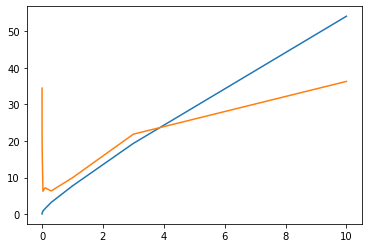

In [859]:
plt.plot(lmbdavec,trainerror)
plt.plot(lmbdavec,cverror)

In [860]:
theta=np.ones((n,1))
nretheta=newtrainlinear(theta,X_poly,y,0)

In [838]:
nretheta

array([ 11.21758931,   9.51981169,  18.95578055,  30.38374823,
       -28.26470076, -78.23457188,   6.63981521,  63.75566778,
        21.90228173])

In [848]:
optimize.minimize

<function scipy.optimize._minimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)>